# WEEK7

In [1]:
import os
print(os.environ['PATH'])

C:\ProgramData\Anaconda3;C:\ProgramData\Anaconda3\Library\mingw-w64\bin;C:\ProgramData\Anaconda3\Library\usr\bin;C:\ProgramData\Anaconda3\Library\bin;C:\ProgramData\Anaconda3\Scripts;C:\ProgramData\Anaconda3\bin;C:\ProgramData\Anaconda3\condabin;C:\ProgramData\Anaconda3;C:\ProgramData\Anaconda3\Library\mingw-w64\bin;C:\ProgramData\Anaconda3\Library\usr\bin;C:\ProgramData\Anaconda3\Library\bin;C:\ProgramData\Anaconda3\Scripts;c:\app\client\admin\product\19.0.0\client_1\bin;C:\Program Files\Common Files\Oracle\Java\javapath;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files\Java\jdk-17.0.2\bin;C:\Users\mca\Downloads\windows_10_cmake_Release_Graphviz-12.2.1-win64\Graphviz-12.2.1-win64\bin;C:\Users\mca\AppData\Local\Microsoft\WindowsApps;C:\Users\mca\AppData\Local\Programs\Microsoft VS Code\bin


In [2]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Users\mca\Downloads\windows_10_cmake_Release_Graphviz-12.2.1-win64\Graphviz-12.2.1-win64\bin"

In [5]:
import graphviz
print(graphviz.__version__)

# Try rendering a basic graph
dot_data = "digraph G { A -> B }"
graph = graphviz.Source(dot_data)
graph.render("simple_graph", format="png", view=True)  # This should show a simple graph


0.20.3


'simple_graph.png'

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Load a simple dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train a simple decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Visualize the decision tree
dot_data = export_graphviz(clf, 
                           feature_names=iris.feature_names,  
                           class_names=iris.target_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = graphviz.Source(dot_data)
graph.render("simple_decision_tree")
graph.view()

'simple_decision_tree.pdf'

## EX 1

### Q1 1.	Use the German credit rating dataset “German Credit Data.csv” , Decision tree classifier to predict good or bad credit. Use “sklearn.model_selection”  and  GridSearchCV to search the hyperparameter values and report the most optimal one. Configure the grid search to search for optimal parameters:
•	Splitting criteria: gini or entropy.
•	Maximum depth of decision tree ranging from 2 to 10.
•	The searching of optimal parameter will be validated using 10-fold cross validation and the most optimal parameter will be chosen based on ROC AUC score.



In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

df = pd.read_csv("German Credit Data.csv")


df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=["status"])
y = df["status"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(2, 11)
}


grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, 
                           scoring="roc_auc", cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", roc_auc)


Best Parameters: {'criterion': 'gini', 'max_depth': 5}
Best ROC AUC Score: 0.7409544416396201


### Q2. Visualize the tree using graphviz toolkit.


In [8]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(best_model, out_file=None, feature_names=X.columns, 
                           class_names=["Bad Credit", "Good Credit"], filled=True, rounded=True)


graph = graphviz.Source(dot_data)
graph.render("decision_tree")  
graph.view()


'decision_tree.pdf'

###  Q3 Display the text representation of the rules learnt.

In [9]:
from sklearn.tree import export_text

# Print decision rules
tree_rules = export_text(best_model, feature_names=list(X.columns))
print(tree_rules)

|--- checkin_acc_A14 <= 0.50
|   |--- duration <= 22.50
|   |   |--- credit_history_A31 <= 0.50
|   |   |   |--- amount <= 1285.00
|   |   |   |   |--- amount <= 1207.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amount >  1207.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- amount >  1285.00
|   |   |   |   |--- amount <= 7491.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amount >  7491.50
|   |   |   |   |   |--- class: 1
|   |   |--- credit_history_A31 >  0.50
|   |   |   |--- amount <= 553.00
|   |   |   |   |--- class: 0
|   |   |   |--- amount >  553.00
|   |   |   |   |--- checkin_acc_A13 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- checkin_acc_A13 >  0.50
|   |   |   |   |   |--- class: 0
|   |--- duration >  22.50
|   |   |--- savings_acc_A65 <= 0.50
|   |   |   |--- duration <= 47.50
|   |   |   |   |--- checkin_acc_A13 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- checkin_acc_A13 >  0.50
|   |   |   |   |   |--

## EX2

### Q1 Use the iris dataset to implement , Decision tree classifier Implement a decision tree classifier, Train it on 80% of the dataset and test on the remaining 20%. Print the classification report and confusion matrix.


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


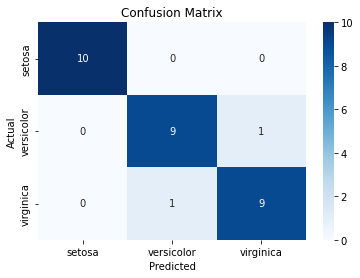

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

iris=load_iris()
X=pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


### Q2 Optimize Hyperparameters Using Grid Search Use GridSearchCV to tune max_depth, min_samples_split, and criterion. Report the best hyperparameter combination and corresponding accuracy.


In [11]:

param_grid = {
    "max_depth": range(1, 11),
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}


grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, 
                           scoring="accuracy", cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


print("Classification Report with Optimized Parameters:\n", classification_report(y_test, y_pred_best))


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
Best Accuracy: 0.9416666666666668
Classification Report with Optimized Parameters:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Q3 Pruning the Decision Tree Implement post-pruning using cost-complexity pruning (ccp_alpha). Find the optimal ccp_alpha by plotting accuracy vs. ccp_alpha values.


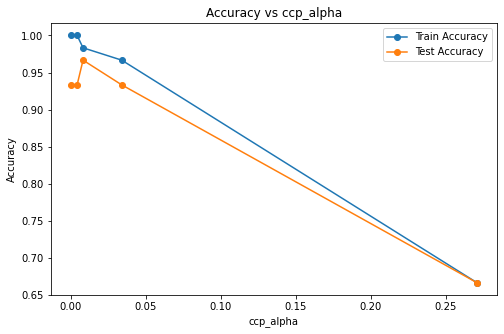

Optimal ccp_alpha: 0.00811403508771929
Classification Report After Pruning:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [12]:

path = best_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]
train_scores, test_scores = [], []


for ccp_alpha in ccp_alphas:
    pruned_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    pruned_clf.fit(X_train, y_train)
    train_scores.append(pruned_clf.score(X_train, y_train))
    test_scores.append(pruned_clf.score(X_test, y_test))


plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_scores, marker="o", label="Train Accuracy")
plt.plot(ccp_alphas, test_scores, marker="o", label="Test Accuracy")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs ccp_alpha")
plt.legend()
plt.show()


optimal_alpha = ccp_alphas[np.argmax(test_scores)]
print("Optimal ccp_alpha:", optimal_alpha)


pruned_model = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
pruned_model.fit(X_train, y_train)


y_pred_pruned = pruned_model.predict(X_test)
print("Classification Report After Pruning:\n", classification_report(y_test, y_pred_pruned))


### Feature Importance Analysis Extract and plot feature importance values from the trained decision tree. Drop the least important feature and retrain the model. Does accuracy improve or decline?


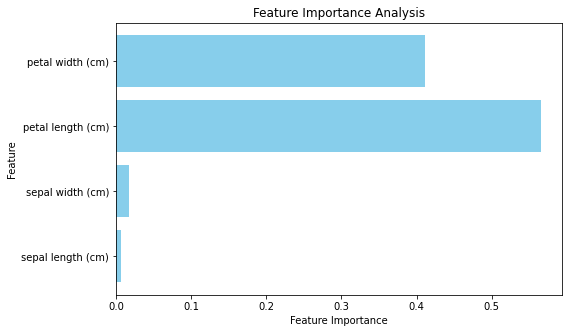

Least Important Feature: sepal length (cm)
Classification Report After Dropping Least Important Feature:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Original Accuracy: 0.9333, Reduced Accuracy: 0.9667
Accuracy Improved!


In [13]:

importances = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Analysis")
plt.show()

least_important_feature = feature_names[np.argmin(importances)]
print("Least Important Feature:", least_important_feature)

X_train_reduced = X_train.drop(columns=[least_important_feature])
X_test_reduced = X_test.drop(columns=[least_important_feature])

reduced_clf = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)
reduced_clf.fit(X_train_reduced, y_train)

y_pred_reduced = reduced_clf.predict(X_test_reduced)
print("Classification Report After Dropping Least Important Feature:\n", classification_report(y_test, y_pred_reduced))

original_accuracy = best_model.score(X_test, y_test)
reduced_accuracy = reduced_clf.score(X_test_reduced, y_test)

print(f"Original Accuracy: {original_accuracy:.4f}, Reduced Accuracy: {reduced_accuracy:.4f}")
if reduced_accuracy > original_accuracy:
    print("Accuracy Improved!")
else:
    print("Accuracy Declined!")
